In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(m, d):
    X = np.random.normal(0, 1, (m, d))
    theta = np.random.choice([0, 1], d)
    xi = np.random.normal(0, 1, m)
    y = X @ theta + xi
    return X, y, theta

def H(X, y, theta):
    return (y - X @ theta).T @ (y - X @ theta)

def metropolis_hastings(X, y, beta, N, theta_init):
    d = theta_init.shape[0]
    theta = theta_init.copy()
    for t in range(N):
        i = np.random.randint(d)
        theta_proposal = theta.copy()
        theta_proposal[i] = 1 - theta_proposal[i]
        H_current = H(X, y, theta)
        H_proposal = H(X, y, theta_proposal)
        acceptance_ratio = min(1, np.exp(-beta * (H_proposal - H_current)))
        if np.random.rand() < acceptance_ratio:
            theta = theta_proposal
    return theta

def mean_squared_error(theta_true, theta_est):
    residuals = theta_est - theta_true
    return np.dot(residuals.T, residuals)

In [2]:
d = 10
ms = range(1, 16)
beta = np.linspace(0.1, 3.0, 5)
N = 100
M = 1000

In [3]:
mse_results = {}
mse_values = []

for b in beta:
    mse_values = []
    for m in ms:
        errors = []
        for _ in range(M):
            X, y, theta_true = generate_data(m, d)
            theta_init = np.random.randint(0, 2, d)
            theta_est = metropolis_hastings(X, y, b, N, theta_init)
            error = mean_squared_error(theta_true, theta_est)
            errors.append(error)
        mse = np.mean(errors)
        mse_values.append(mse)
    mse_results[b] = mse_values

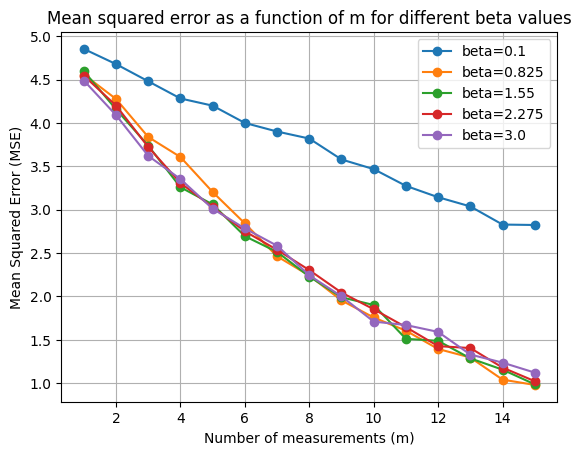

In [4]:
for b in beta:
    plt.plot(ms, mse_results[b], marker='o', label=f'beta={b}')
plt.xlabel('Number of measurements (m)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean squared error as a function of m for different beta values')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
d = 10
ms = range(1, 16)
beta = 1.0
N = 1000
M = 10000

In [6]:
mse_values = []
for m in ms:
    errors = []
    for _ in range(M):
        X, y, theta_true = generate_data(m, d)
        theta_init = np.random.randint(0, 2, d)
        theta_est = metropolis_hastings(X, y, beta, N, theta_init)
        error = mean_squared_error(theta_true, theta_est)
        errors.append(error)
    mse = np.mean(errors)
    mse_values.append(mse)

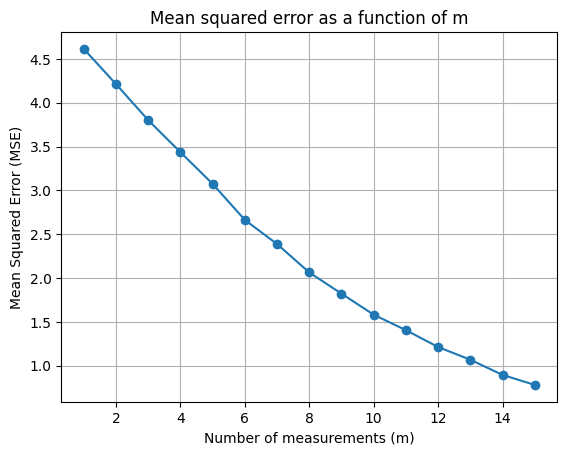

In [7]:
plt.plot(ms, mse_values, marker='o')
plt.xlabel('Number of measurements (m)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean squared error as a function of m')
plt.grid(True)
plt.show()

In [8]:
threshold_mse = 1.0
reliable_m_indices = [i for i, mse in enumerate(mse_values) if mse < threshold_mse]
if reliable_m_indices:
    min_m = ms[reliable_m_indices[0]]
    print(f"Minimum value of m/d to reliably recover theta: {min_m/d:.2f}")
else:
    print("No value of m was found for which the MSE is below the threshold.")

Minimum value of m/d to reliably recover theta: 1.40
